## Matplotlib 학습

### Matplotlib
파이썬 시각화 라이브러리. 다양한 차트 생성가능

#### Matplotlib 설치
```python
!pip install matplotlib
```

In [94]:
# 설치
!pip install matplotlib

#### Matplotlib 사용
```python
import matplotlib.pyplot as plt
```

In [95]:
import matplotlib.pyplot as plt
import numpy as np

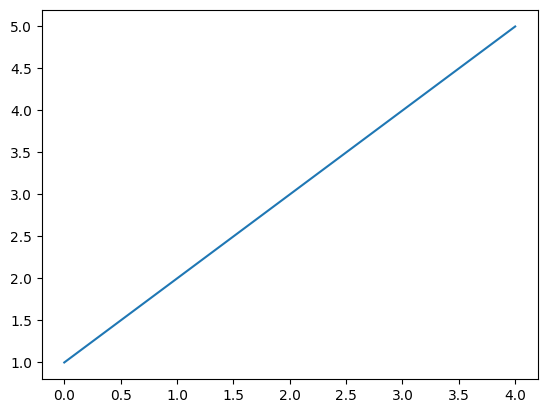

In [96]:
## 단일차트
plt.plot([1,2,3,4,5])
plt.show() # [<matplotlib.lines.Line2D at 0x157ffd82c90>] 와 같은 객체 정보 출력이 사라짐

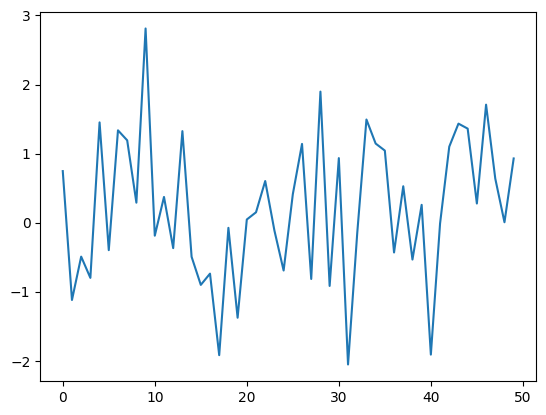

In [97]:
plt.plot(np.random.randn(50)) # np.random.randn(n) n개의 정수를 랜덤하게 만들어줌
plt.show()

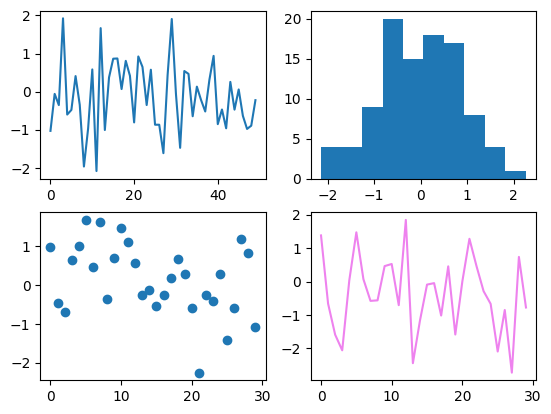

In [98]:
## 다중차트, figure() 사용 4개 이상 불가
fig = plt.figure() 
plt1 = fig.add_subplot(2, 2, 1) # 1번 차트
plt2 = fig.add_subplot(2, 2, 2) # 2번 차트
plt3 = fig.add_subplot(2, 2, 3) # 3번 차트
plt4 = fig.add_subplot(2, 2, 4) # 4번 차트

plt1.plot(np.random.randn(50))
plt2.hist(np.random.randn(100))
plt3.scatter(np.arange(30), np.random.randn(30))
plt4.plot(np.random.randn(30), 'violet') # 색상 'r','g','b','y','violet'

plt.show()

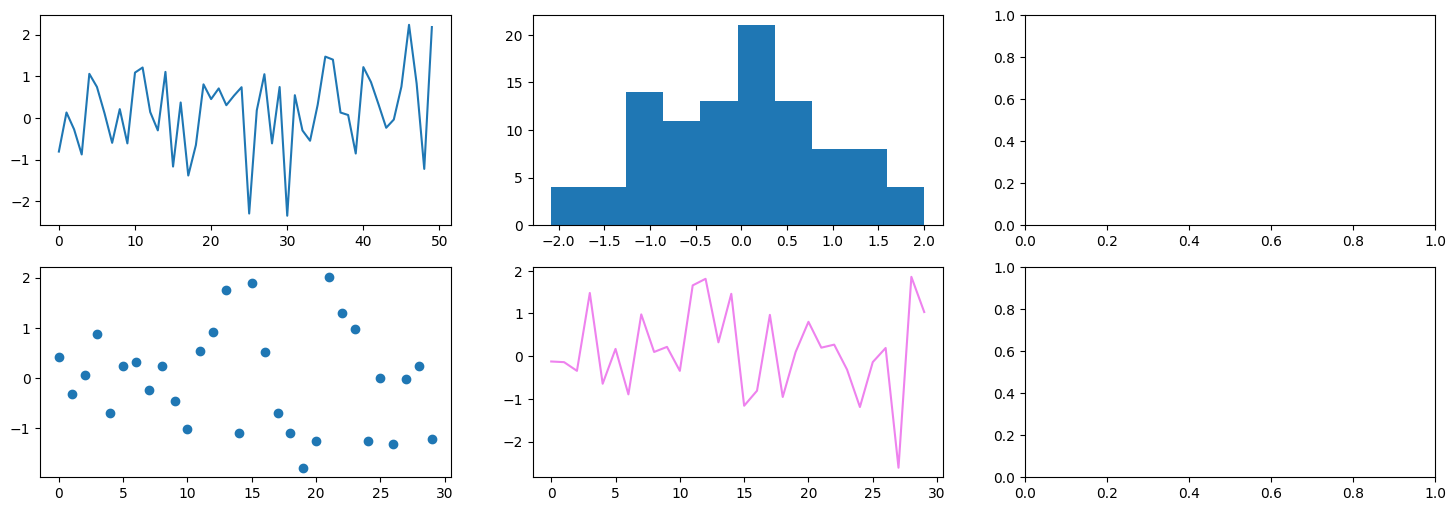

In [99]:
## 다중차트 2번째, 4개 이상 가능
# subplots() figsize로 차트 넓이 조정가능 
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
axes[0][0].plot(np.random.randn(50))
axes[0][1].hist(np.random.randn(100))
axes[1][0].scatter(np.arange(30), np.random.randn(30))
axes[1][1].plot(np.random.randn(30), 'violet')

plt.show()

#### 차트 스타일 지정 옵션
- label, style, alpha, rot, xticks, yticks, xlim, ylim, color, marker, ...

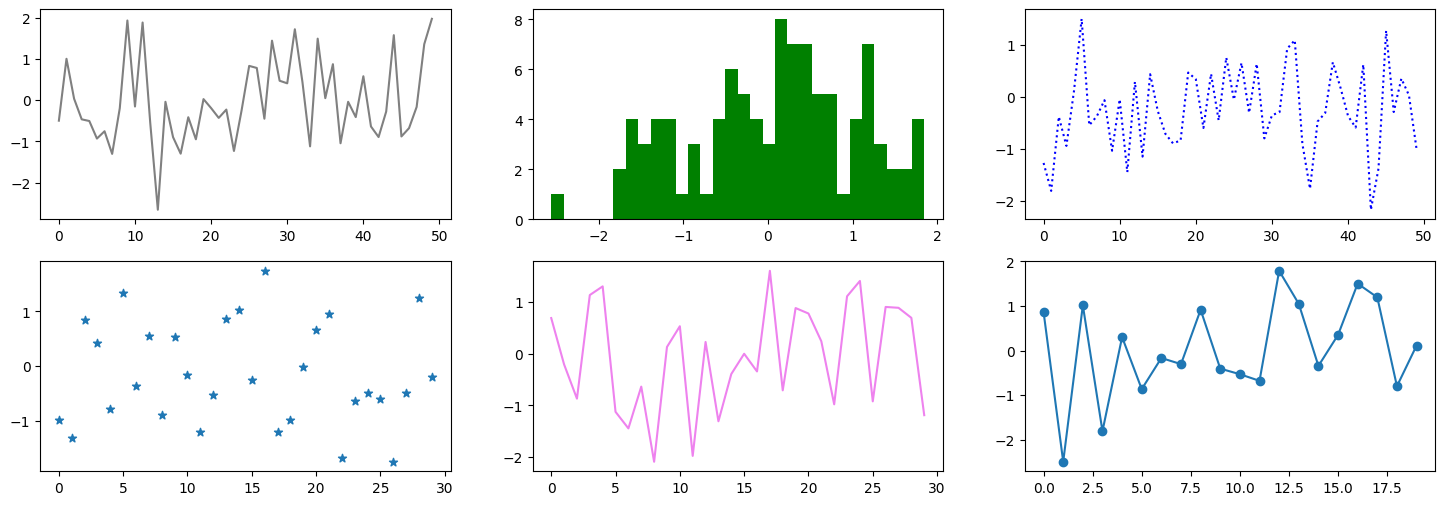

In [100]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
# color = 'k'검은색, 'crimson'핏빛, alpha= 0.0완전투명 1.0투명도없음
axes[0][0].plot(np.random.randn(50), color='gray', alpha=1.0)
# bins는 그루핑개수
axes[0][1].hist(np.random.randn(100), color='g', bins=30)
# linestyle 선 종류 -, :, --, -. / solid, dotted, dashed, dashdot
axes[0][2].plot(np.random.randn(50), color='b', linestyle=':')
# marker *(별), ^(삼각형), o(동그라미)
axes[1][0].scatter(np.arange(30), np.random.randn(30), marker='*')
axes[1][1].plot(np.random.randn(30), 'violet')
axes[1][2].plot(np.random.randn(20), marker='o')

plt.show()

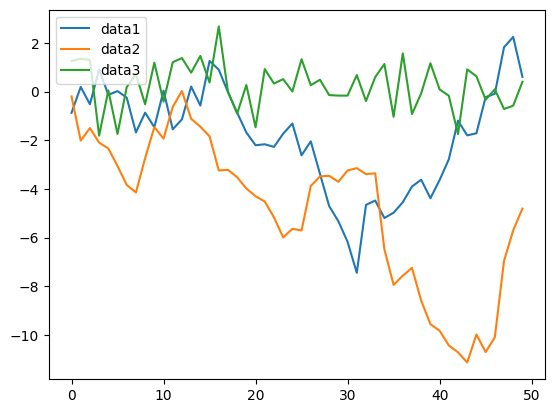

In [101]:
# cumsum() cumulative sum(누적합)
# legend() 범례 표시함수
# 플롯에 데이터 여러개 표시되면 파란색, 주황색, 녹색 순
plt.plot(np.random.randn(50).cumsum(), label='data1')
plt.plot(np.random.randn(50).cumsum(), label='data2')
plt.plot(np.random.randn(50), label='data3')
# 위치 값 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 
# 'center right', 'lower center', 'upper center', 'center'
plt.legend(loc='upper left')
plt.show()

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


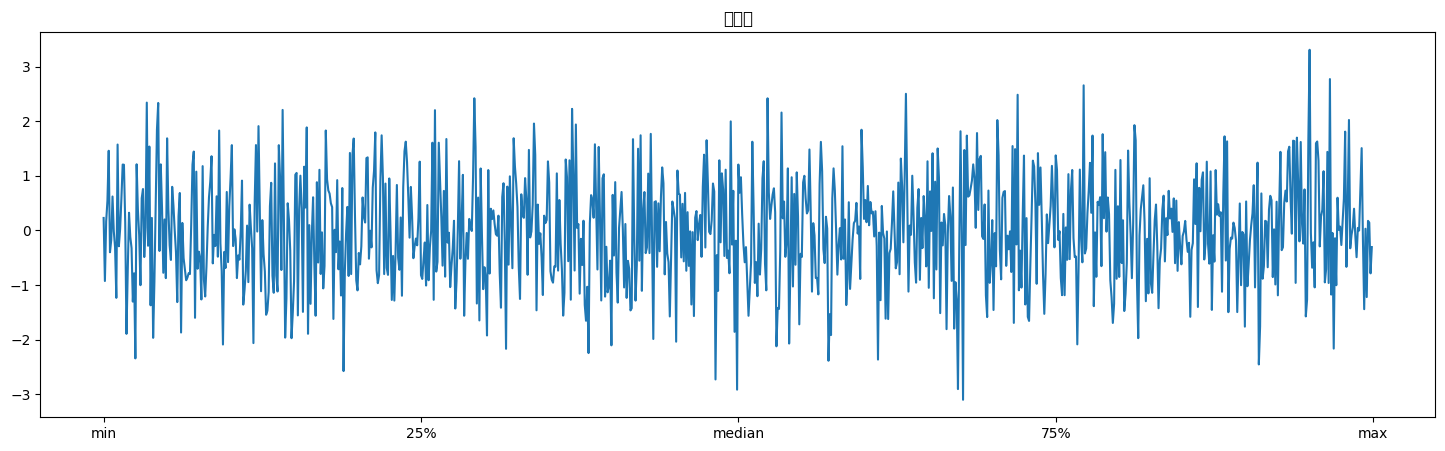

In [102]:
## x, y축 설정
plt.figure(figsize=(18, 5))
plt.plot(np.random.randn(1000))
plt.xticks([0, 250, 500, 750, 1000], labels=['min', '25%', 'median', '75%', 'max'])
## y축도 동일하게 변경 가능
plt.title('통계치') # 한글은 기본적 지원 안함
plt.show()

In [103]:
## Pandas DF, Series를 바로 MatplotLib과 연계 바로 차트를 그릴 수 있슴
import pandas as pd

In [104]:
df_all = pd.read_excel('./data/df_all.xlsx')
df_all

,국적코드,성별,입국객수,국적명
0,A01,남성,106320,일본
1,A01,여성,191436,일본
2,A31,남성,319,NaN
3,A31,여성,42,NaN
4,A18,남성,158912,중국
5,A18,여성,232943,중국
6,A01,남성,92556,일본
7,A01,여성,163737,일본
8,A18,남성,155540,중국
9,A18,여성,249023,중국


#### Matplotlib 한글 표시 문제
- 기본적으로 한글을 지원. font_manager 객체사용해서 한글을 쓸 수 있도록 변경
- 한글을 기본으로 쓰기때문에 항상 이 아래부분은 노트북쓸때마다 복사해서 사용

In [106]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'

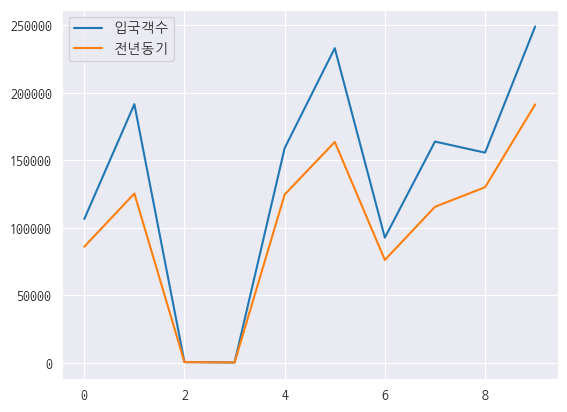

In [ ]:
# 한글 문제 그대로 존재
df_all.plot()
plt.show()

### Seaborn 라이브러리
- Matplotlib 서드파티(제3자) 라이브러리. 기본인 Matplotlib만큼 많이 활용되는 라이브러리
- 기본 보다 훨씬더 미려하게 차트를 생성할 수 있음

#### 설치
```python
!pip install seaborn
```

In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Seaborn 특징
- 기본적으로 샘플 데이터도 제공
- 손쉽게 샘플 차트를 생성 가능

In [ ]:
## 내장 데이터셋 목록 확인
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
flights = sns.load_dataset('flights') # 1949~1960년 월별 비행기승객수

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
# seaborn 스타일 지정 ["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set_style('darkgrid')

In [ ]:
# seaborn 칼라코드 muted, 'pastel'
sns.set_color_codes('pastel')

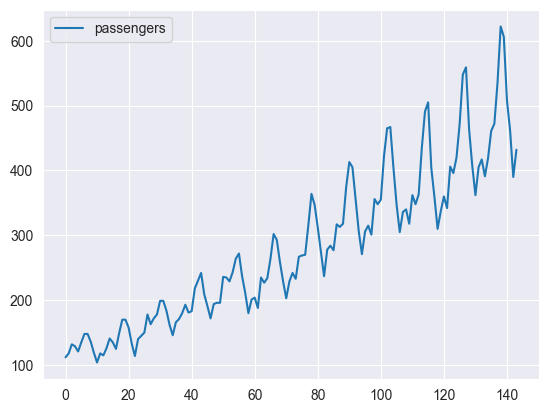

In [ ]:
flights[['month', 'passengers']].plot()
plt.show()

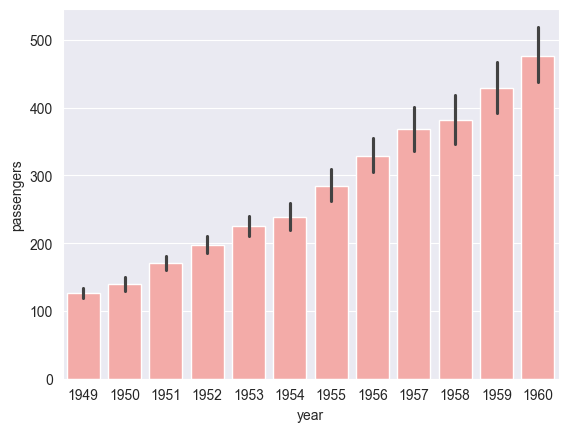

In [ ]:
sns.barplot(data=flights, x='year', y='passengers', color='r')
plt.show()

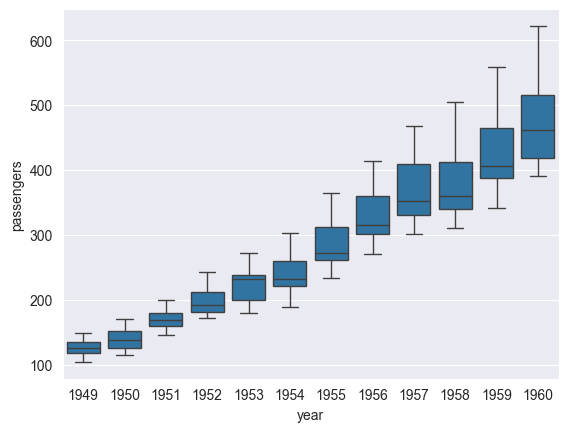

In [ ]:
sns.boxplot(data=flights, x='year', y='passengers')
plt.show()

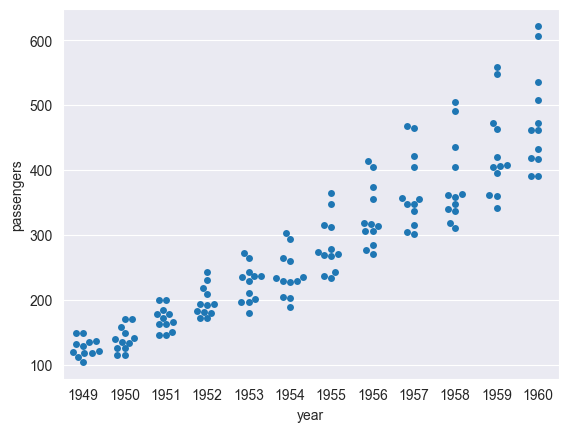

In [ ]:
sns.swarmplot(data=flights, x='year', y='passengers')
plt.show()

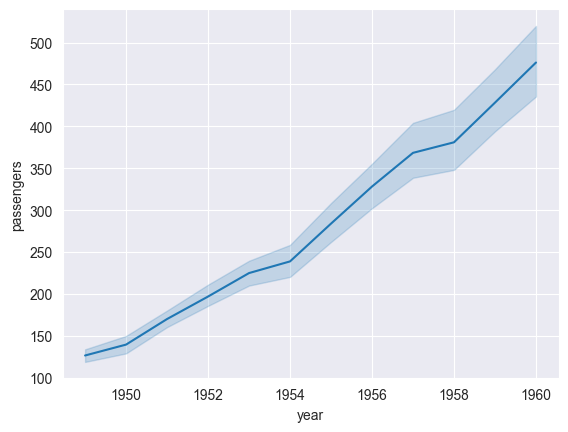

In [ ]:
sns.lineplot(data=flights, x='year', y='passengers')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14784\2562992360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights['passengers'])


<Axes: xlabel='passengers', ylabel='Density'>

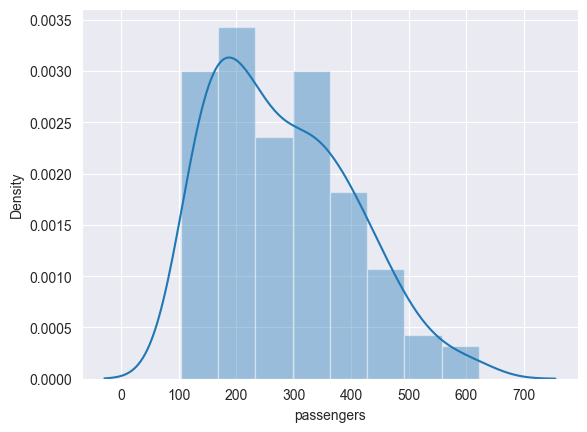

In [ ]:
# 다음 버전 0.14.0 에서 삭제될 예정
sns.distplot(flights['passengers'])

<Axes: >

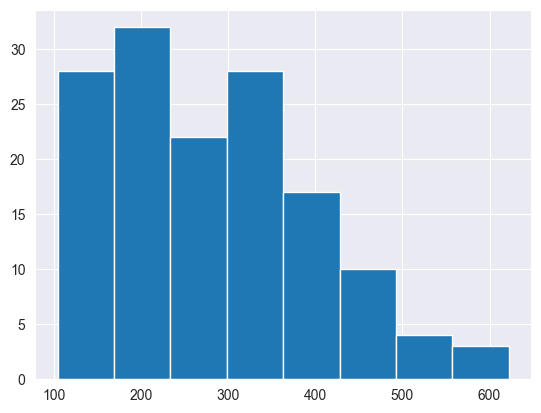

In [ ]:
flights['passengers'].hist(bins=8)

In [ ]:
titanics = sns.load_dataset('titanic')
titanics

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
